# EDA: SMARD-Verbrauchsdaten (2015- 2023)

Datenquelle: Bundesnetzagentur | SMARD.de https://www.smard.de/home/downloadcenter/download-marktdaten/ 

SMARD-Benutzerhandbuch: https://www.smard.de/home/benutzerhandbuch 

Werte im Datensatz sind Energiewerte [MWh] pro Viertelstunde.
Daten kommen über die ENTSO-E Transparenzplattform. Dort werden sie als Leistungsmittelwerte angegeben [MW].

In diesem Notebook verwenden wir auch Leistungsmittelwerte.
In den grafischen Darstellungen werden sowohl Leistungsmittelwerte als auch summierten Energiewerte verwendet.
Z.B. nutzen wir Leistungsmittelwerte beim Vergleich zwischen verschiedenen zyklischen Betrachtungen (siehe z.B. [Box Plots](#box-plots)
) oder zur Validierung (z.B. bzgl der Spitzenleistung).
Summierte Energiewerte werden z.B. in Kalenderplots mit Tagen genutzt (siehe z.B. [Heat Maps](#heat-maps)).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Daten einlesen

In [2]:
# Funktion zum Einlesen der SMARD-Daten sowie Umbenennung der Spalten
def read_SMARD_data(path):
    df = pd.read_csv(path, delimiter=';', thousands='.', decimal=',', parse_dates=[[0,1]], dayfirst="True")

    # Spalten umbenennen
    df = df.rename(
        columns={
        'Datum_Anfang': "Datum",
        'Gesamt (Netzlast) [MWh] Originalauflösungen': 'RealisierterStromverbrauch',
        'Residuallast [MWh] Originalauflösungen': 'Residuallast',
        'Pumpspeicher [MWh] Originalauflösungen' : 'StrombezugPumpspeicher'
        }
    )

    df.pop('Ende')
    return df

In [3]:
# Eingelesene Daten werden sowohl in DataFrames pro Jahr als auch in einem DataFrame (df) für alle Jahre gespeichert
url="https://raw.githubusercontent.com/koljaeger/smardcast/main/data/Realisierter_Stromverbrauch_"
df_2015 = read_SMARD_data(f"{url}201501010000_201512312359_Viertelstunde.csv")
df_2016 = read_SMARD_data(f"{url}201601010000_201612312359_Viertelstunde.csv")
df_2017 = read_SMARD_data(f"{url}201701010000_201712312359_Viertelstunde.csv")
df_2018 = read_SMARD_data(f"{url}201801010000_201812312359_Viertelstunde.csv")
df_2019 = read_SMARD_data(f"{url}201901010000_201912312359_Viertelstunde.csv")
df_2020 = read_SMARD_data(f"{url}202001010000_202012312359_Viertelstunde.csv")
df_2021 = read_SMARD_data(f"{url}202101010000_202112312359_Viertelstunde.csv")
df_2022 = read_SMARD_data(f"{url}202201010000_202212312359_Viertelstunde.csv")
df_2023 = read_SMARD_data(f"{url}202301010000_202312312359_Viertelstunde.csv")

# Werte für Leistungsmittelwerte [MW] berechnen
df_2015['Leistungsmittelwert [MW]'] = df_2015['RealisierterStromverbrauch'] / 0.25
df_2016['Leistungsmittelwert [MW]'] = df_2016['RealisierterStromverbrauch'] / 0.25
df_2017['Leistungsmittelwert [MW]'] = df_2017['RealisierterStromverbrauch'] / 0.25
df_2018['Leistungsmittelwert [MW]'] = df_2018['RealisierterStromverbrauch'] / 0.25
df_2019['Leistungsmittelwert [MW]'] = df_2019['RealisierterStromverbrauch'] / 0.25
df_2020['Leistungsmittelwert [MW]'] = df_2020['RealisierterStromverbrauch'] / 0.25
df_2021['Leistungsmittelwert [MW]'] = df_2021['RealisierterStromverbrauch'] / 0.25
df_2022['Leistungsmittelwert [MW]'] = df_2022['RealisierterStromverbrauch'] / 0.25
df_2023['Leistungsmittelwert [MW]'] = df_2023['RealisierterStromverbrauch'] / 0.25

# Zusammenführen der DataFrames
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])

# Datum in DateTime-Format umwandeln
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y %H:%M')

# erste Statistiken
df.describe()

,Datum,RealisierterStromverbrauch,Residuallast,StrombezugPumpspeicher,Leistungsmittelwert [MW]
count,315552,315552.000000,315552.000000,315552.000000,315552.000000
mean,2019-07-02 12:27:45.972010752,14087.519219,9675.665667,331.262372,56350.076875
min,2015-01-01 00:00:00,6984.750000,-1545.000000,0.000000,27939.000000
25%,2017-04-01 18:56:15,12026.250000,7552.000000,30.750000,48105.000000
50%,2019-07-02 12:52:30,14009.000000,9785.250000,170.500000,56036.000000
75%,2021-10-01 06:48:45,16176.500000,11911.000000,530.750000,64706.000000
max,2023-12-31 23:45:00,20341.500000,19193.250000,2188.250000,81366.000000
std,NaN,2506.492812,3243.911910,384.105730,10025.971248


## Datenqualität
Einfache Überprüfungen zur Datenvollstständigkeit und Validierung mit anderen Quellen (z.B. https://de.statista.com/statistik/daten/studie/164149/umfrage/netto-stromverbrauch-in-deutschland-seit-1999/  oder https://www.bdew.de/service/daten-und-grafiken/nettostromverbrauch-nach-verbrauchergruppen/ )

Datenvalidierung zeigt Unterschiede von bis zu ~5% zu den anderen Quellen!

In [4]:
import pandas as pd

# Any NaNs?
df_nans = df['RealisierterStromverbrauch'].isnull()
print(f'# of NaNs: {df_nans.sum()}')

# no. of rows?
exp_no_of_rows = 9 * 365 * 24 * 4 + 2 * 24 * 4  # 9 Jahre a 365 Tage und 96 Werte pro Tag. + 2 Schaltjahre
print(f"# of expected rows {exp_no_of_rows} = ; # of rows in dataset = {df['RealisierterStromverbrauch'].count()}; Difference = {exp_no_of_rows - df['RealisierterStromverbrauch'].count()}")

# Verbrauch pro Jahr von Statista
df_statista = pd.DataFrame({
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Verbrauch [TWh]': [523, 526, 527, 520, 507, 491, 504, 484, 467]
})

# Vergleich der Verbrauchswerte 2015-2023 mit Statista
print(f"Yearly consumption 2015 [TWh]: {df_2015['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2015]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2016 [TWh]: {df_2016['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2016]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2017 [TWh]: {df_2017['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2017]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2018 [TWh]: {df_2018['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2018]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2019 [TWh]: {df_2019['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2019]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2020 [TWh]: {df_2020['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2020]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2021 [TWh]: {df_2021['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2021]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2022 [TWh]: {df_2022['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2022]['Verbrauch [TWh]'].values[0]})")
print(f"Yearly consumption 2023 [TWh]: {df_2023['RealisierterStromverbrauch'].sum() / 1000 / 1000:.0f} (Statista: {df_statista[df_statista['Year'] == 2023]['Verbrauch [TWh]'].values[0]})")
print(f"Average yearly consumption [TWh]: {df['RealisierterStromverbrauch'].sum() / 1000 / 1000 / 9:.0f}")

# of NaNs: 0
# of expected rows 315552 = ; # of rows in dataset = 315552; Difference = 0
Yearly consumption 2015 [TWh]: 500 (Statista: 523)
Yearly consumption 2016 [TWh]: 503 (Statista: 526)
Yearly consumption 2017 [TWh]: 506 (Statista: 527)
Yearly consumption 2018 [TWh]: 509 (Statista: 520)
Yearly consumption 2019 [TWh]: 497 (Statista: 507)
Yearly consumption 2020 [TWh]: 485 (Statista: 491)
Yearly consumption 2021 [TWh]: 505 (Statista: 504)
Yearly consumption 2022 [TWh]: 483 (Statista: 484)
Yearly consumption 2023 [TWh]: 457 (Statista: 467)
Average yearly consumption [TWh]: 494


## Heat Maps
Energiedaten weisen typischerweise hohe Saisonalitäten auf und unterscheiden sich im täglichen, wöchentlichen und jährlichen Verlauf. Dies ist auch für die SMARD-Daten zu beobachten und kann mit Heat Maps mit unterschiedlicher zeitlicher Gruppierung dargestellt werden.

In [5]:
# Funktion zum Hinzufügen von Zeitinformationen für z.B. Uhrzeit, Wochentag, etc.
def addTimeInformation(df):
    df['Time'] = df['Datum'].dt.time
    df['Month'] = df['Datum'].dt.strftime('%b')
    df['Year Month'] = df['Datum'].dt.strftime('%Y %m')
    df['Year Month Day'] = df['Datum'].dt.strftime('%Y %m %d')
    df['Day'] = df['Datum'].dt.strftime('%d')
    df['Year'] = df['Datum'].dt.strftime('%Y')
    df['Weekday'] = df['Datum'].dt.strftime('%u')
    df['Week'] = df['Datum'].dt.strftime('%W')
    return df

In [6]:
# Heatmap über Monate und Tage
def plotCalendarHeatmap(df, title, colName, linewidths=0.01):
    heatmap_data = df.pivot_table(index='Year Month', columns='Day', values=colName, aggfunc=np.sum)    # Werte summiert über den Tag!

    plt.figure(figsize=(20, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=linewidths, cbar=True, xticklabels=1)

    plt.title(title)
    plt.xlabel('Tag')
    plt.ylabel('Monat')

    plt.show()

In [7]:
# Heatmap über Wochentage und Viertelstunden
def plotWeekdayHeatmap(df, title, colName):
    heatmap_data = df.pivot_table(index='Weekday', columns='Time', values=colName, aggfunc=np.mean) # Leistungsmittelwerte!

    plt.figure(figsize=(20, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=.8, cbar=True, xticklabels=1)

    plt.title(title)
    plt.xlabel('Viertelstunde')
    plt.ylabel('Wochentag')

    plt.show()  

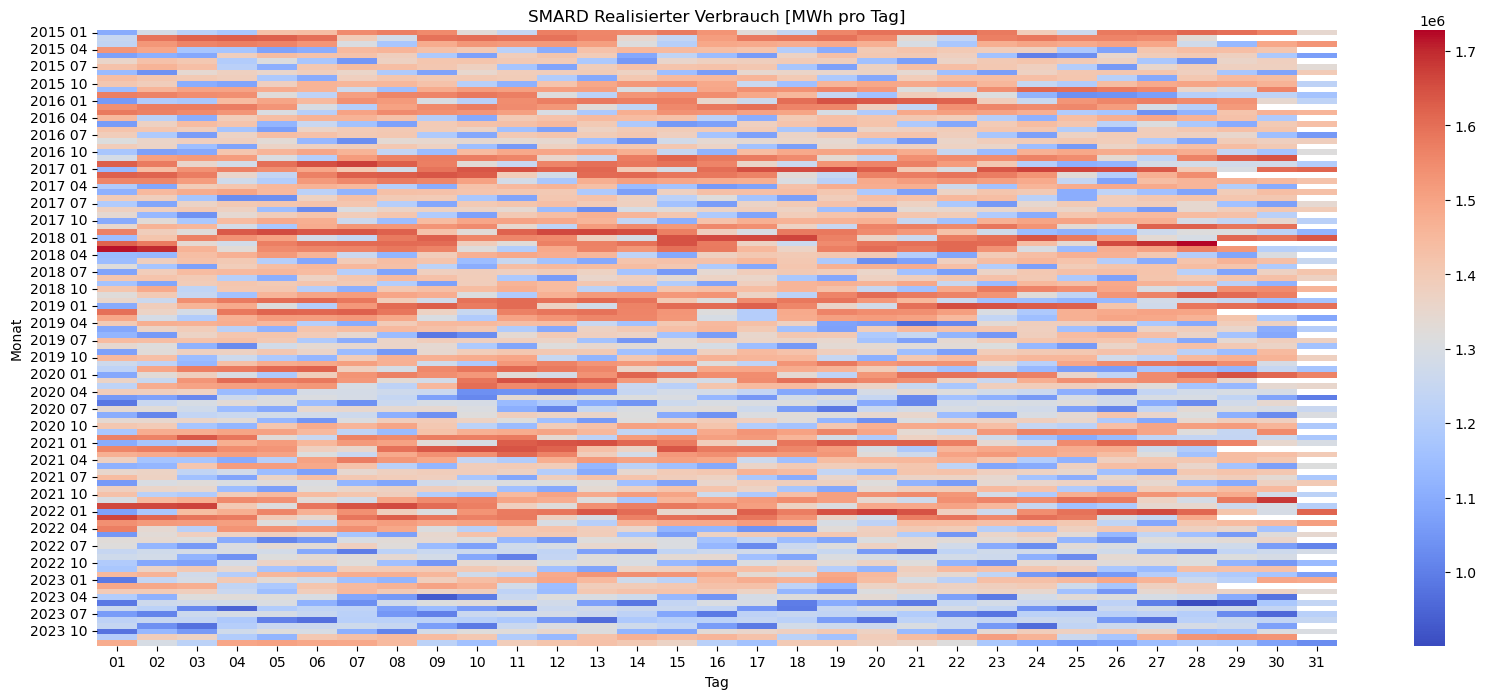

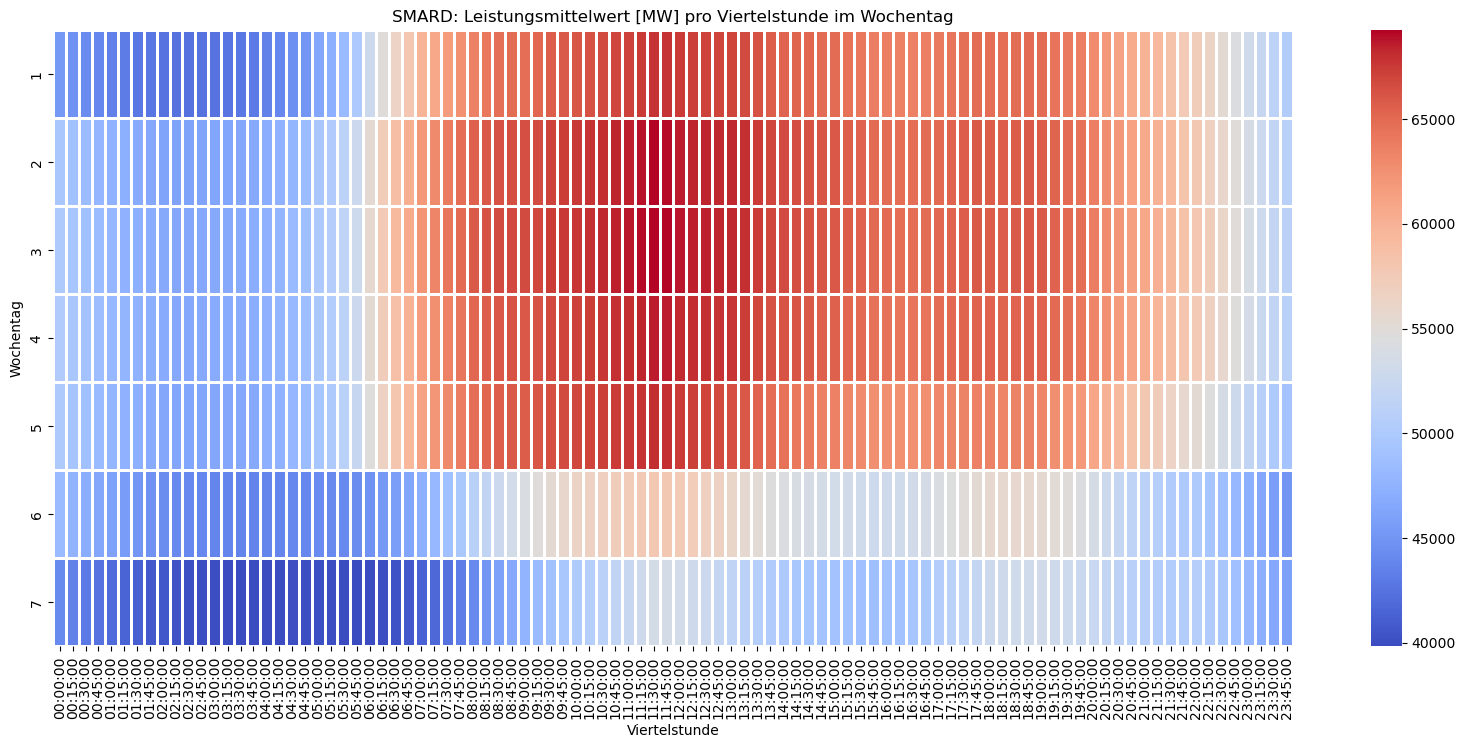

In [8]:
# Heatmap für SMARD 2015 - 2023
df = addTimeInformation(df)
plotCalendarHeatmap(df, 'SMARD Realisierter Verbrauch [MWh pro Tag]', 'RealisierterStromverbrauch', linewidths=0)  
plotWeekdayHeatmap(df, 'SMARD: Leistungsmittelwert [MW] pro Viertelstunde im Wochentag', 'Leistungsmittelwert [MW]')

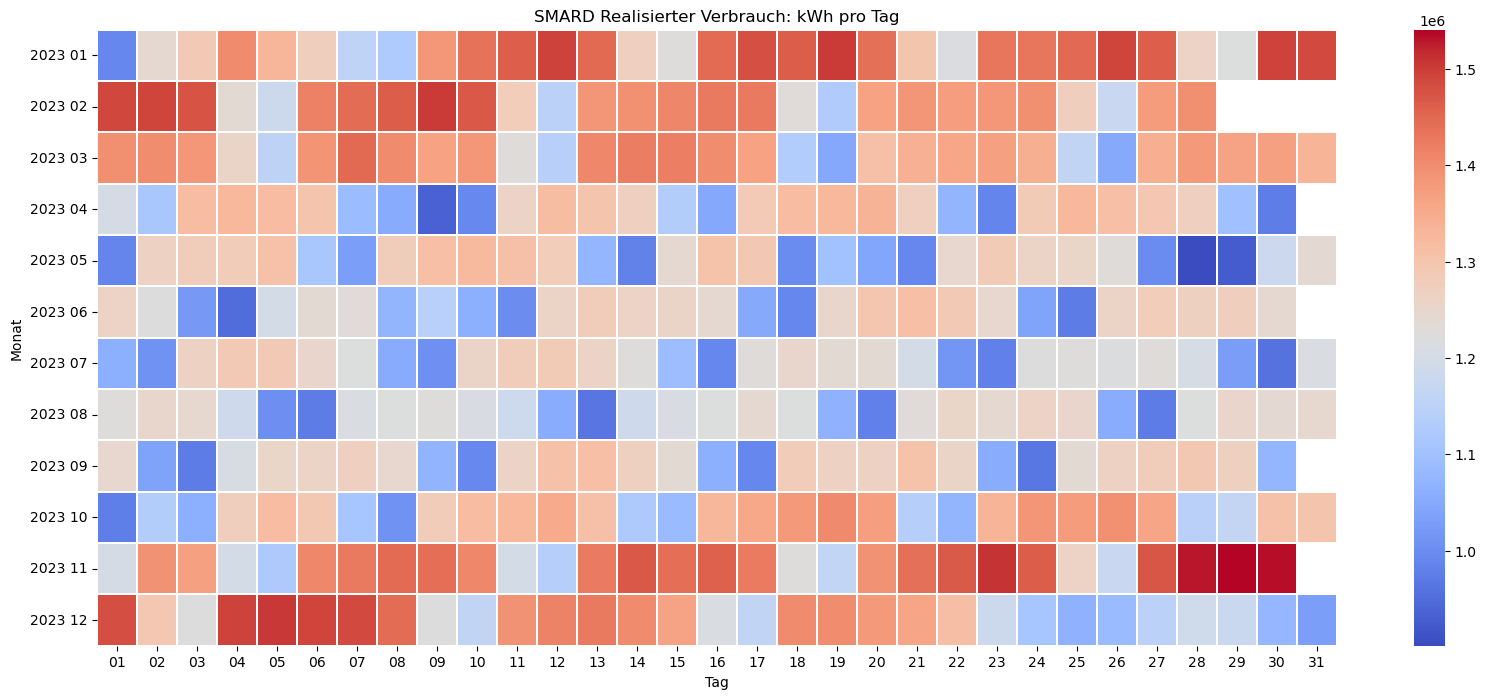

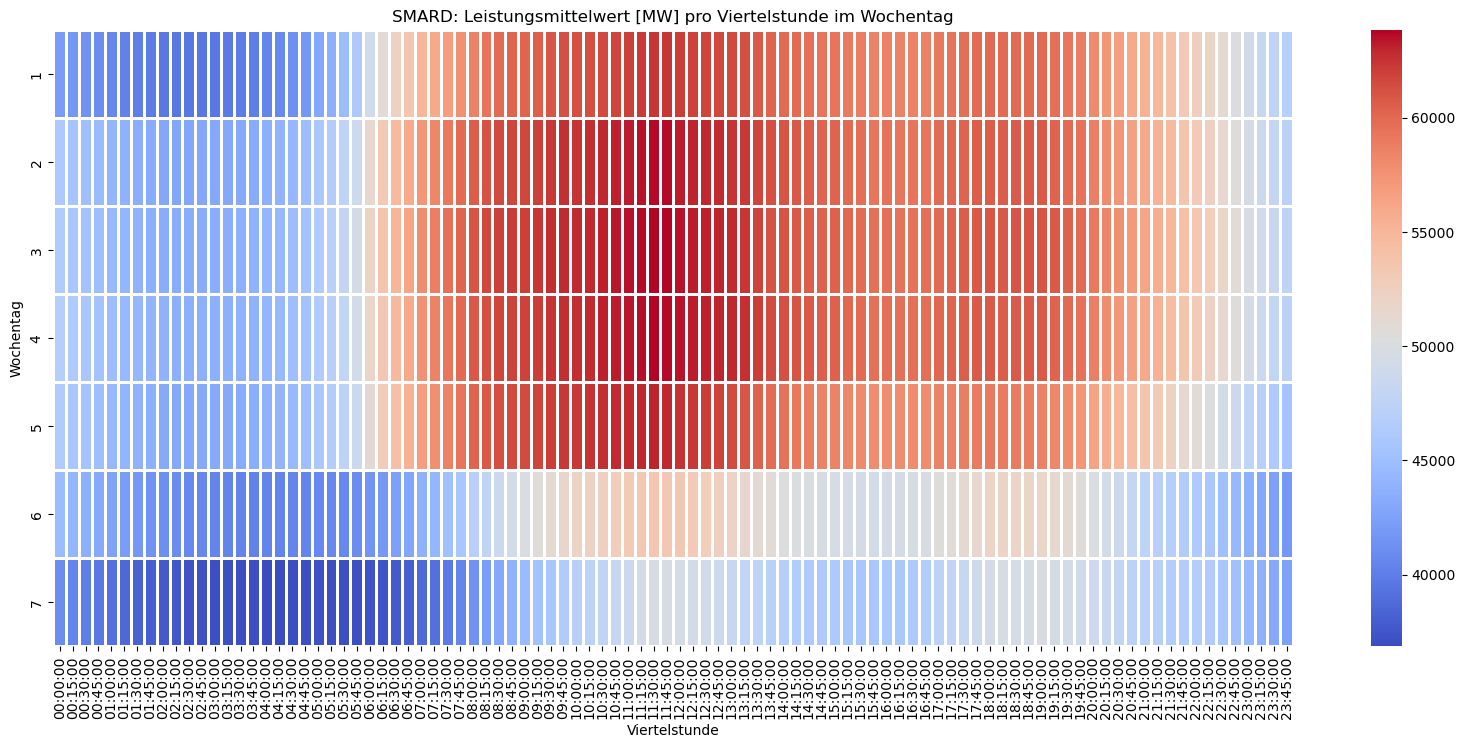

In [9]:
# Heatmap für ein spezifisches Jahr (hier 2023)
df_2023 = addTimeInformation(df_2023)
plotCalendarHeatmap(df_2023, 'SMARD Realisierter Verbrauch: kWh pro Tag', 'RealisierterStromverbrauch')  
plotWeekdayHeatmap(df_2023, 'SMARD: Leistungsmittelwert [MW] pro Viertelstunde im Wochentag', 'Leistungsmittelwert [MW]')

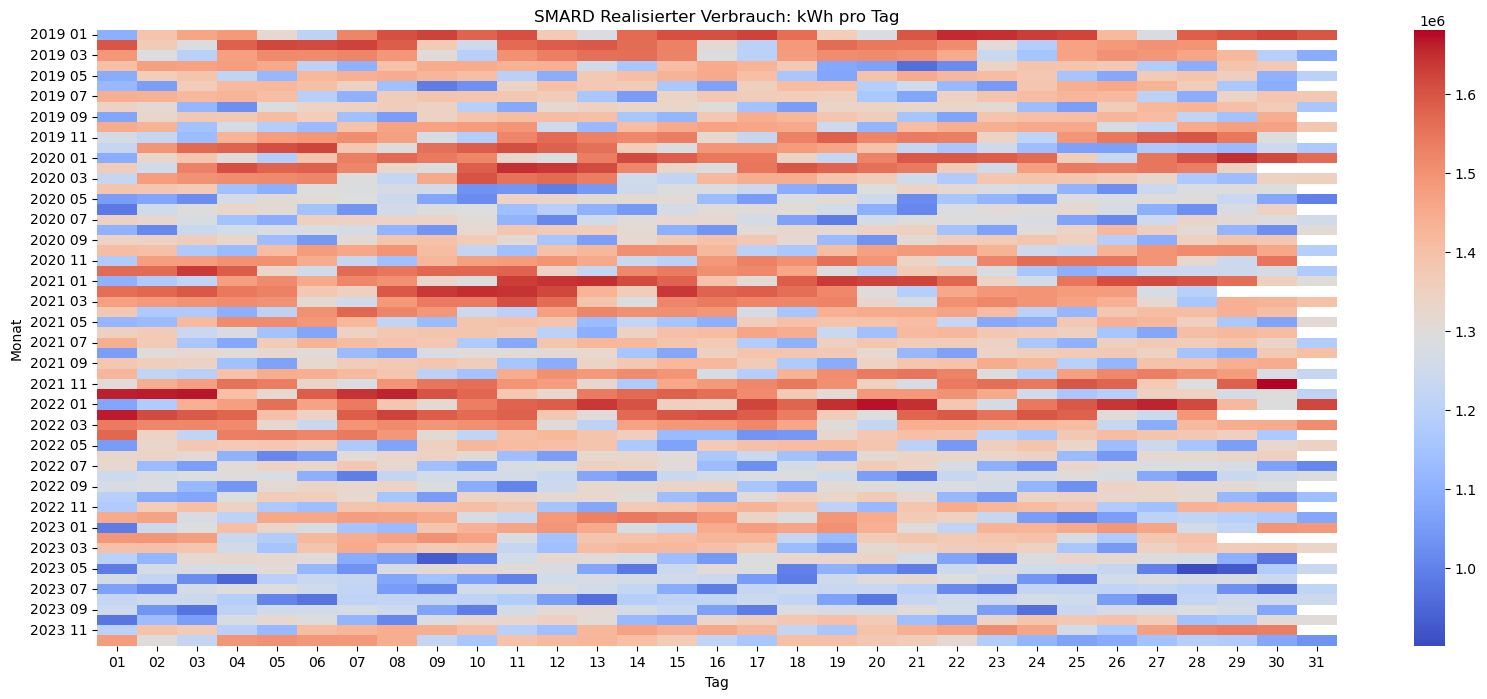

In [10]:
# SMARD 2019 - 2023
plotCalendarHeatmap(df[df['Datum'] >='2019-01-01'], 'SMARD Realisierter Verbrauch: kWh pro Tag', 'RealisierterStromverbrauch', linewidths=0)      

## Box Plots
Box Plots geben einen guten Einblick in die Verteilung der Daten und können für verschiedene Zeitintervalle dargestellt werden.

In [11]:
def plotBoxplot(df, title, colName):
    fig, axes = plt.subplots(3, 2, figsize=(18, 10))
    fig.suptitle(f"{title}: Boxplots der Leistung (MW) Gesamt und pro Monat, Wochentag und Viertelstunde")
    
    sns.boxplot(ax=axes[0, 0], y=colName, data=df)
    sns.boxplot(ax=axes[0, 1], x='Year', y=colName, data=df)
    
    sns.boxplot(ax=axes[1, 0], x='Month', y=colName, data=df)
    sns.boxplot(ax=axes[1, 1], x='Weekday', y=colName, data=df, order=['1','2','3','4','5','6','7'])
 
    ax=sns.boxplot(ax=axes[2, 0], x='Week', y=colName, data=df)
    
    # format x-axis and omit every second label
    labels = [t.get_text() for t in ax.get_xticklabels()]
    labels = [int(label) for label in labels]
    ax.set_xticks(ax.get_xticks()[::2])  # Keep every second tick
    ax.set_xticklabels(labels[::2], rotation=90, fontsize=8)  # Keep every second label

    ax=sns.boxplot(ax=axes[2, 1], x='Time', y=colName, data=df)
    
    # format x-axis and omit every second label
    labels = [t.get_text() for t in ax.get_xticklabels()]
    labels = [datetime.strptime(label, '%H:%M:%S').strftime('%H:%M') for label in labels]
    ax.set_xticks(ax.get_xticks()[::2])  # Keep every second tick
    ax.set_xticklabels(labels[::2], rotation=90, fontsize=8)  # Keep every second label

    plt.show()

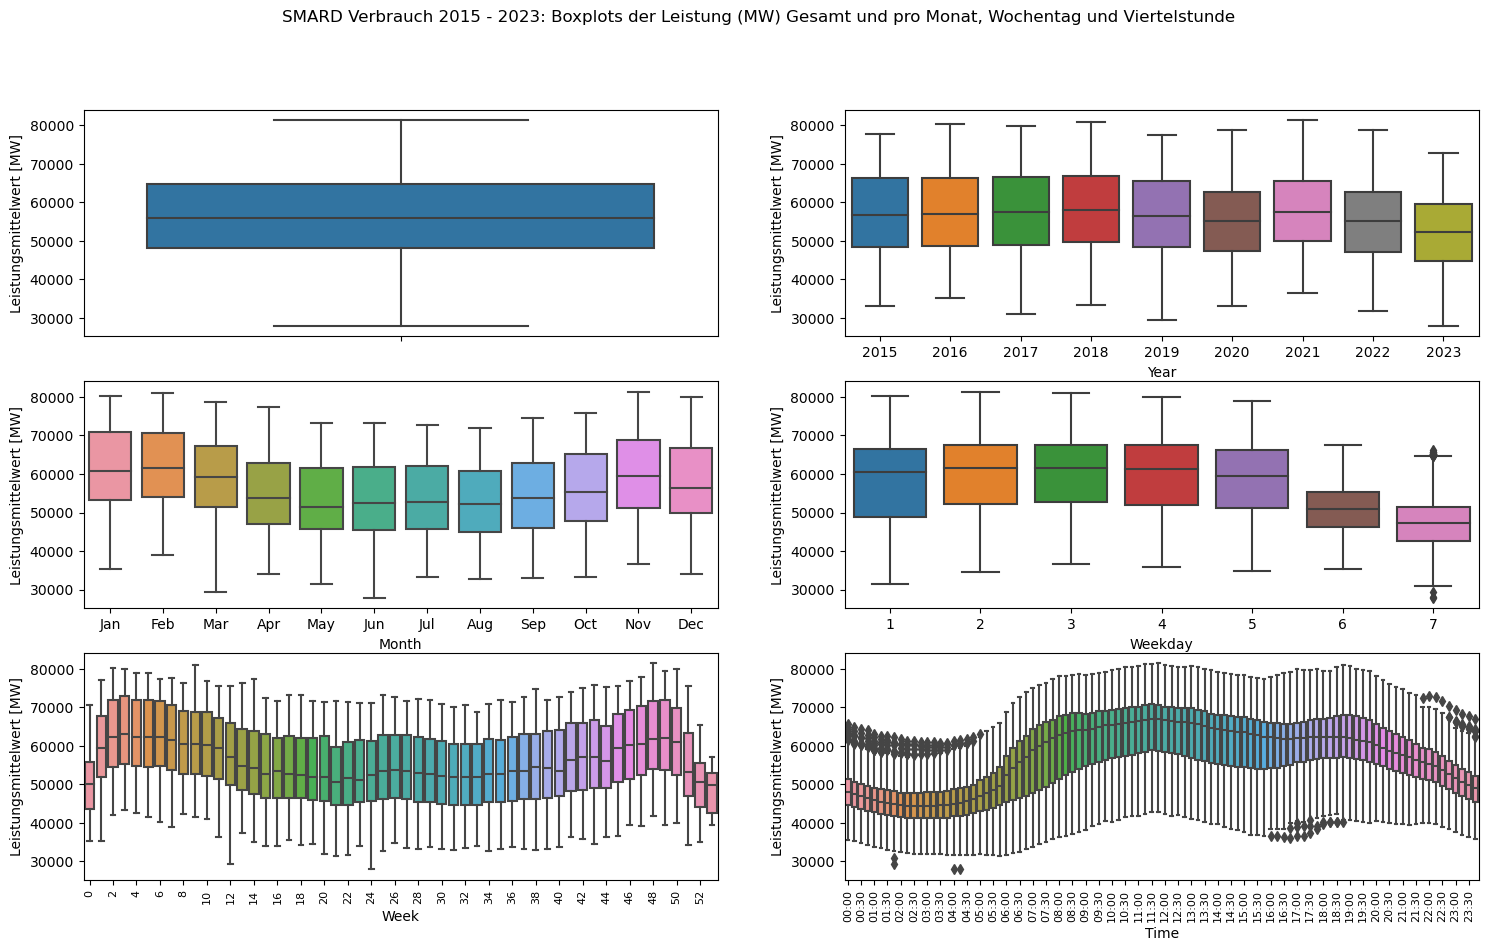

In [12]:
plotBoxplot(df, "SMARD Verbrauch 2015 - 2023", "Leistungsmittelwert [MW]")